<a href="https://colab.research.google.com/github/MasatoKawai/HUFA/blob/main/VISUALIZE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# モジュールのダウンロードとデータの接続


1.   下記のコードを実行する
2.   その際にgoogleの認証が必要なので許可するボタンを押す



In [ ]:
#@title まずはこのセルを実行！
import glob                                           # フォルダ内のパスをリスト化するモジュール
import pandas as pd                                   # csvをdataFrameとして読み込むモジュール
import seaborn as sns
import matplotlib.pyplot as plt
import math
%pip install japanize-matplotlib
import japanize_matplotlib
from google.colab import files

%matplotlib inline

# driveの中のデータにアクセスできるようにマウントする
from google.colab import drive
drive.mount('/content/drive/')

# チームスクリプトが存在するディレクトリへ移動
%cd 'drive/MyDrive/2022/#2_teamscript'

     |████████████████████████████████| 4.1 MB 7.9 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=1464d618736221f65d2768b361e1c969f41ddede016e57d8c33eb8be2f551974
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib
Mounted at /content/drive/
/content/drive/MyDrive/2022/#2_teamscript


# 指定の状況に合わせて可視化

- ALL_PLAY_REPORT:すべてのプレーを一覧で表示するもの
- TOP_PLAY_REPORT:上位8プレーの時系列描画をするもの
- PLAY_REPORT:指定のプレークラスの時系列描画をするもの
- PLAYER_REPORT:指定のプレーヤーのレポートを描画するもの
- QB_REPORT:QBのレポートを描画するもの
- WR_REPORT:WRのレポートを描画するもの

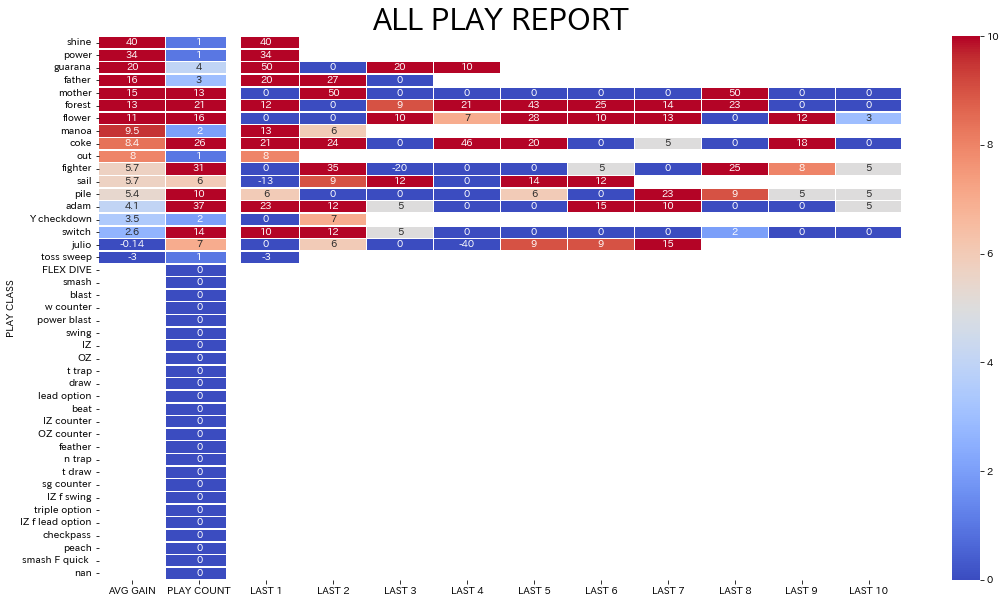

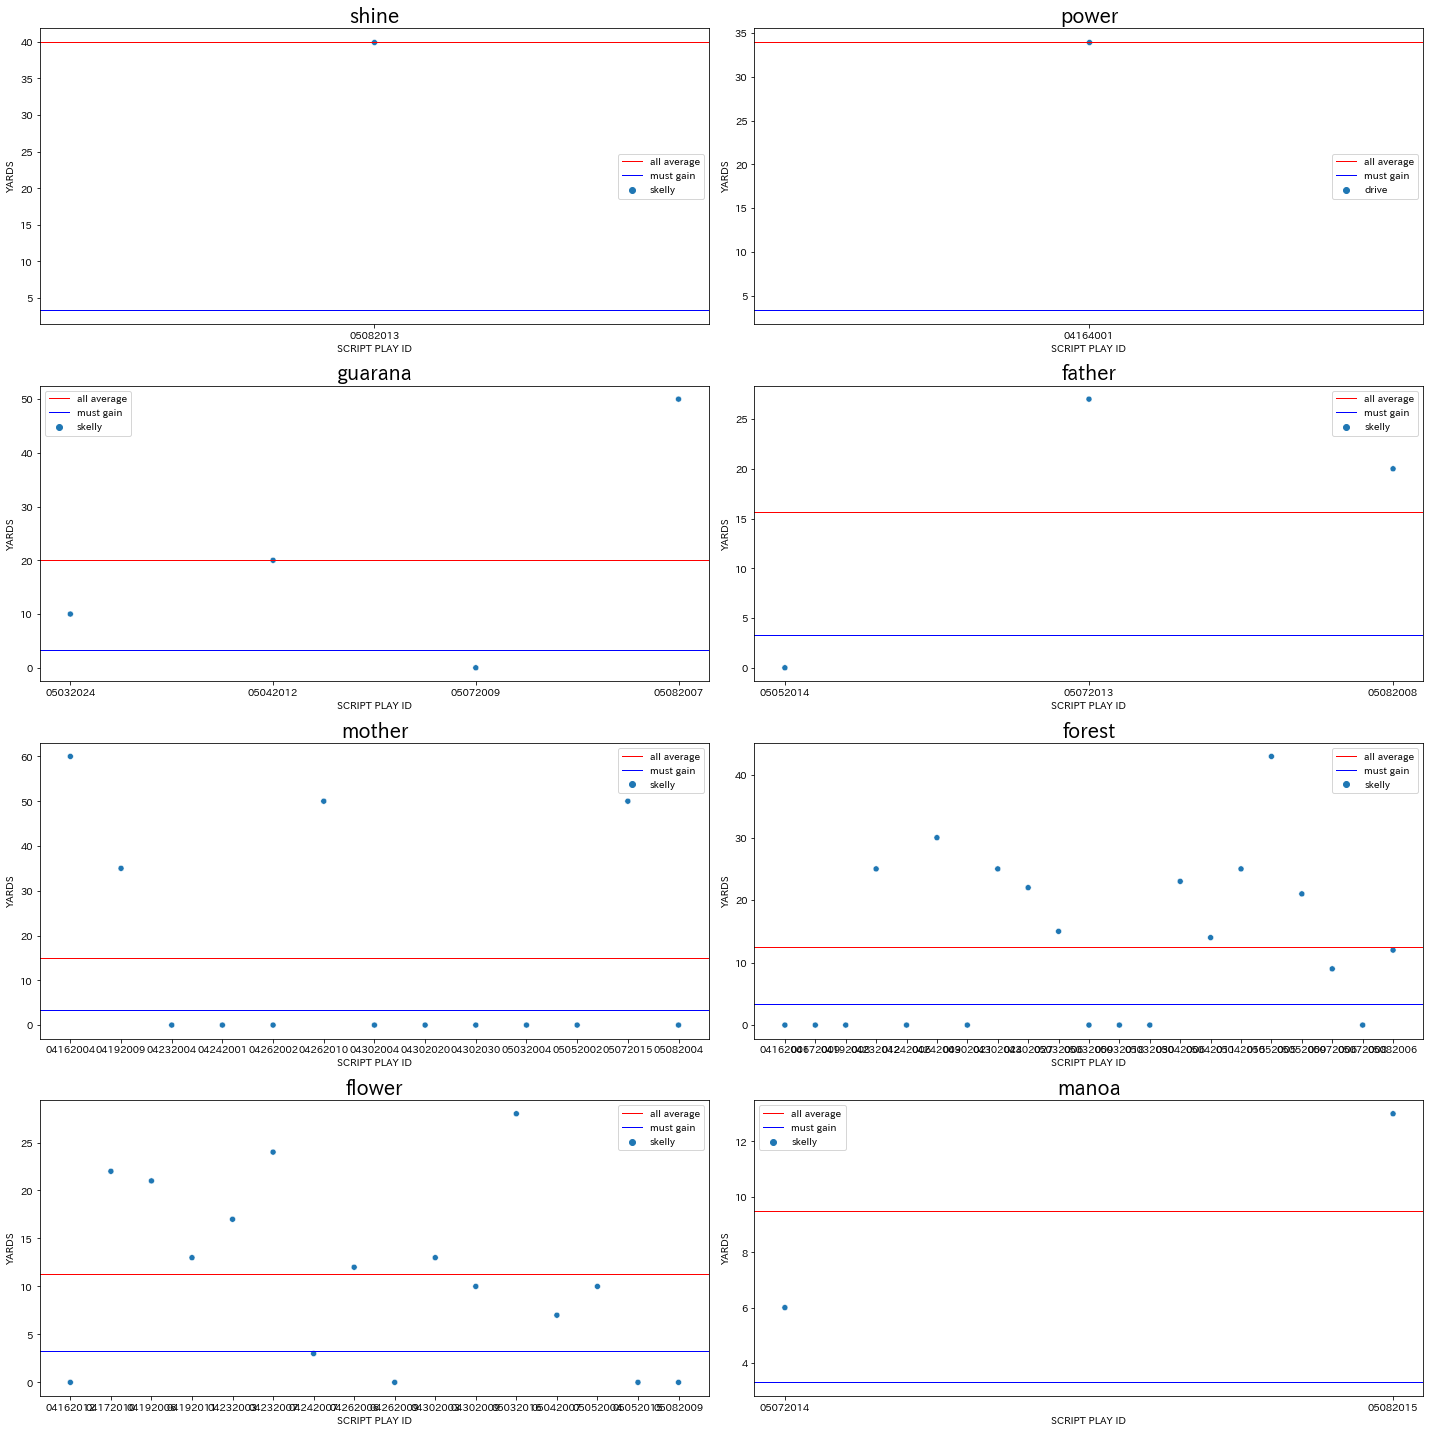

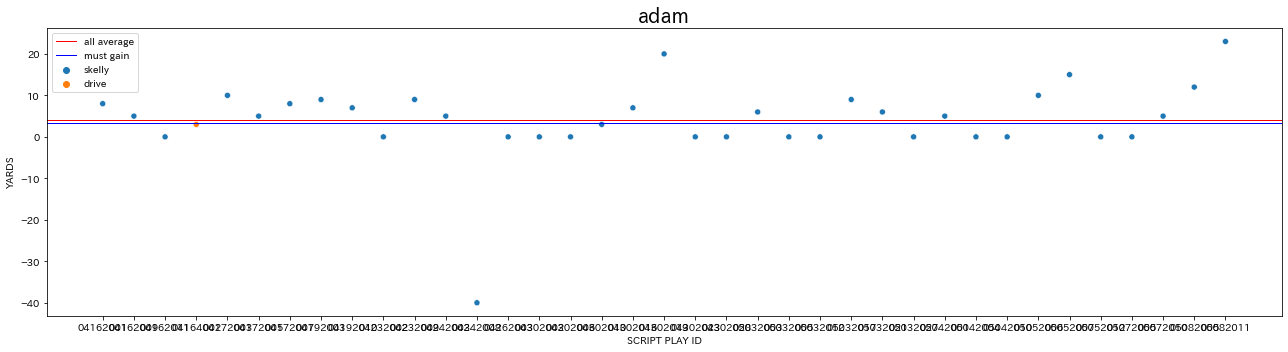

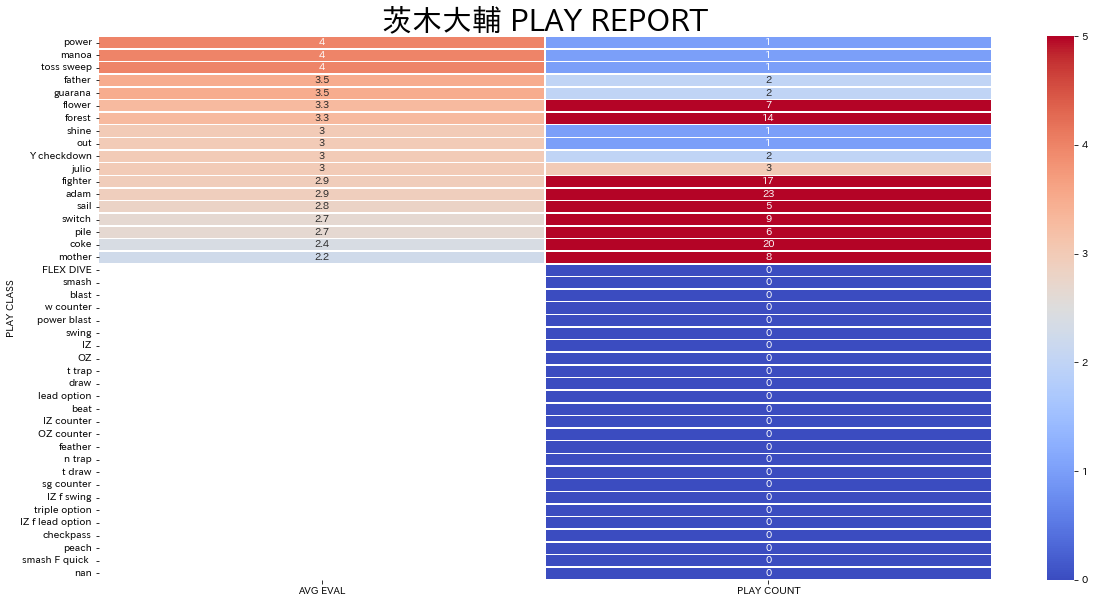

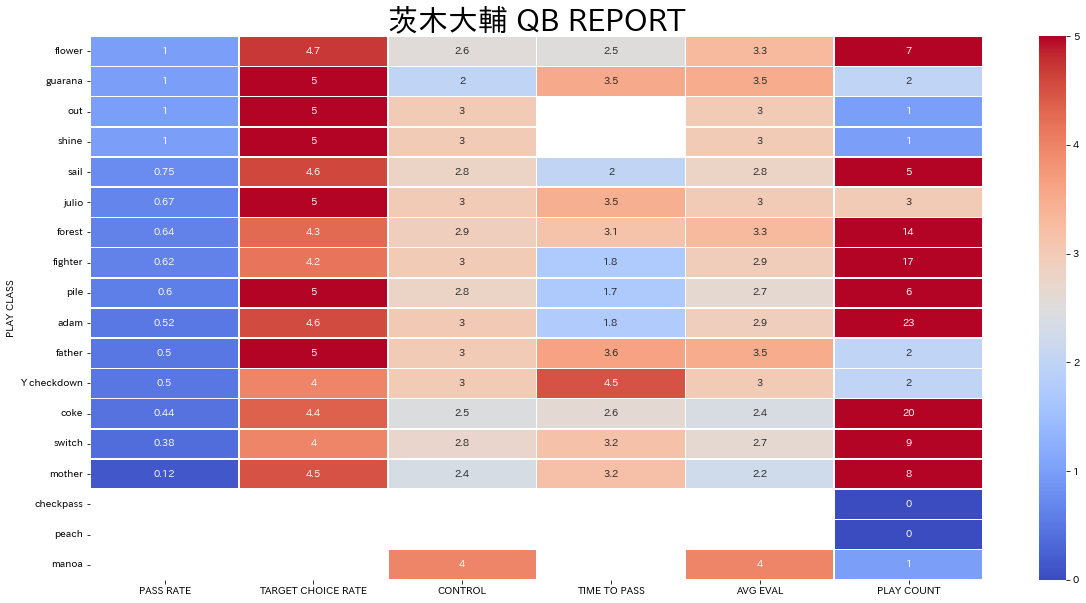

0

In [ ]:
# フォルダ内のファイル名を全て取得しリストに格納
files = glob.glob("./script_csv/*")

ALL_PLAY_REPORT = True #@param {type:"boolean"}
TOP_PLAY_REPORT = True #@param {type:"boolean"}
PLAY_REPORT = True #@param {type:"boolean"}
PLAYER_REPORT = True #@param {type:"boolean"}
QB_REPORT = True #@param {type:"boolean"}
WR_REPORT = False #@param {type:"boolean"}

play_class = 'adam' #@param {type:"string"}
player_name = '\u8328\u6728\u5927\u8F14' #@param {type:"string"}

def HUFA(
    files, 
    form_DF_path = 'settings/SCRIPT_DATA - FORM_database.csv', 
    play_DF_path = 'settings/SCRIPT_DATA - PLAY_database_CSV.csv',
    ALL_PLAY_REPORT = True,
    TOP_PLAY_REPORT = True,
    PLAY_REPORT = True,
    PLAYER_REPORT = True,
    QB_REPORT = True,
    WR_REPORT = True,
    play_class = 'adam',
    player_name = '茨木大輔'
    ):
  form_DF = pd.read_csv(form_DF_path)
  play_DF = pd.read_csv(play_DF_path)

  # play_class_DFというプレー方向に依存しないプレーのデータベースを作成する
  play_class_DF = pd.DataFrame(
      {
          'PLAY CLASS':play_DF['PLAY CLASS'].unique(),
          'AVG GAIN':float('nan'),
          'PLAY COUNT':float('nan'),
          'LAST 1':float('nan'),
          'LAST 2':float('nan'),
          'LAST 3':float('nan'),
          'LAST 4':float('nan'),
          'LAST 5':float('nan'),
          'LAST 6':float('nan'),
          'LAST 7':float('nan'),
          'LAST 8':float('nan'),
          'LAST 9':float('nan'),
          'LAST 10':float('nan')
      }
      )
  def csv_files_to_all_script_dataframe(files, play_DF):
    '''
    INPUT:files
    OUTPUT:dataframe

    スクリプトのパスをリストとして持つfilesから一つの連結されたdataframeを作成．

    MORE
    - 新しくカラムを作成したりすると連結時にエラーが生じることがあるためカラムが追加されてもエラーを返さないコードに改善出来るとよい．
    - コード実行の際に参照したfile名の日付を出力するときちんと意図したデータを含んでいるか確認できる.
    - csvの名前に(1)などの情報がついていても対応できるようにするとなお良い．
    '''
    # 空のリストを作成し，以降のデータフレームを追加していく
    df_list = []

    # 関数の作成,classを数字に変更するため
    def class_to_ID(class_name):
      class_dict = {
          "team":"1",
          "skelly":"2",
          "inside":"3",
          "drive":"4",
          "game":"5"
      }
      return class_dict[class_name]

    for a_file in files:
      script_DF = pd.read_csv(a_file)                   # fileの名前よりデータフレームとして読み込む

      script_name = a_file.split()[2].split('.')[0]     # file名の中から日付とスクリプトの分類を含む要素を抜き取る
      script_month = script_name.split('_')[0]          # script_nameから月を抜き取る
      script_day = script_name.split('_')[1]            # script_nameから日を抜き取る
      script_class = script_name.split('_')[2]          # script_nameから分類を抜き取る
      script_play_num = int(script_name.split('_')[3])  # script_nameからプレー数を抜き取る
      script_DF = script_DF[0:script_play_num]          # データフレームの中できれいな部分を抜き出す


      script_DF['MONTH'] = script_month                 # DFに月を登録
      script_DF['DAY'] = script_day                     # DFに日を登録
      script_DF['CLASS'] = script_class                 # DFにクラスを登録
      script_DF['CLASS ID'] = "0"                       # CLASS IDの初期化
      script_DF['CLASS ID'] = script_DF['CLASS'].apply(class_to_ID)
      script_DF['SCRIPT ID'] = script_DF.apply(lambda x:x['MONTH'].zfill(2) + x['DAY'].zfill(2) + x['CLASS ID'], axis=1)
      script_DF['SCRIPT PLAY ID'] = script_DF.apply(lambda x:x['SCRIPT ID'] + str(x['NO']).zfill(3), axis=1)


      df_list.append(script_DF)                         # 後に結合するためリストにまとめておく

    # 追加していたリストを基にデータフレームを結合する
    all_script_DF = pd.concat(df_list,ignore_index=True)

    # all_script_DFに新しく'PLAY CLASS'のカラムを追加するための関数
    all_script_DF = pd.merge(all_script_DF, play_DF[['PLAY NAME', 'PLAY CLASS']], how='left')

    return all_script_DF

  all_script_DF = csv_files_to_all_script_dataframe(files, play_DF)

  def fill_play_class_DF(play_class_DF, all_script_DF):
    '''
    INPUT:play_class_DF, all_script_DF
    OUTPUT:play_class_DF

    all_script_DFという練習情報よりplay_class_DFを埋めていく
    '''
    for i in range(len(play_class_DF)):
      # play classの設定
      play_class = play_class_DF.loc[i, 'PLAY CLASS']
      # 条件を満たすデータベースの抽出
      extracted_script_DF = all_script_DF[all_script_DF['PLAY CLASS']==play_class].sort_values('SCRIPT PLAY ID', ascending=False).reset_index(drop=True)
      # データベースよりプレー数と平均ヤードを変数に代入する
      play_class_num = len(extracted_script_DF)
      play_class_avg = extracted_script_DF['YARDS'].mean()
      # LAST X部分の補完
      iter_num = len(extracted_script_DF)
      # 10より大きい場合の対処
      if iter_num > 10:
        iter_num = 10
      # 'LAST X'の更新
      for j in range(iter_num):
        play_class_DF.loc[i, 'LAST {}'.format(j+1)] = extracted_script_DF.loc[j, 'YARDS']
      # database設定
      play_class_DF.loc[i, 'PLAY COUNT'] = play_class_num
      play_class_DF.loc[i, 'AVG GAIN'] = play_class_avg
    return play_class_DF.sort_values('AVG GAIN', ascending=False)

  play_class_DF = fill_play_class_DF(play_class_DF, all_script_DF)

  def report_B1(play_class_DF):
    '''
    INPUT:dataframe
    OUTPUT:figure

    dataframeの情報を可視化．すべてのプレーの一覧の関数
    MORE:
    - すべての項目について同じカラーマップを使用しているのでカラムごとにカラーマップを使えるとよい．
    '''
    plt.figure(figsize=(18, 10))

    B_plot_DF = play_class_DF.sort_values('AVG GAIN', ascending=False).copy()
    B_plot_DF.index = B_plot_DF['PLAY CLASS']
    B_plot_DF = B_plot_DF.drop(['PLAY CLASS'], axis=1)
    sns.heatmap(B_plot_DF, yticklabels=B_plot_DF.index, cmap='coolwarm', annot=True, linewidths=.5, vmin = 0, vmax =10)
    x = 2
    plt.axvline(x=x, linewidth=15, color="w")
    plt.title('ALL PLAY REPORT', fontsize=30)
    plt.show()

  if ALL_PLAY_REPORT == True:
    report_B1(play_class_DF)

  def report_B2(play_class_DF, all_script_DF, plot_num=8):
    '''
    INPUT:dataframe
    OUTPUT:figure

    MORE:
    - SCRIPT IDをxの目盛りとしているが，数が多くなるとごちゃごちゃになりそうなのでここをきれいに出来るとよい
    - あるいは期間を引数に取ることで指定期間のプレーレポートもわかる．
    '''
    # 表示するグラフのサイズ設定
    fig = plt.figure(figsize=(20,5*math.ceil(plot_num/2)))


    for i in range(plot_num):
      # i番目の平均獲得ヤード数を誇るプレーの取り出し
      play_class = play_class_DF.sort_values('AVG GAIN', ascending=False).reset_index(drop=True).loc[i, 'PLAY CLASS']
      # i番目の実際のスクリプト情報を抜き出し
      extracted_script_DF = all_script_DF[all_script_DF['PLAY CLASS']==play_class].sort_values('SCRIPT PLAY ID').reset_index(drop=True)

      plt.subplot(math.ceil(plot_num/2), 2, i+1)
      plt.title(play_class, fontsize=20)
      # 抜き出したプレーの描画
      sns.scatterplot(data=extracted_script_DF, x='SCRIPT PLAY ID', y='YARDS', hue='CLASS')

      # 平均値赤線記述のための設定
      y = extracted_script_DF['YARDS'].mean()
      plt.axhline(y=y, linewidth=1, color="red", label='all average')

      y_minimum = 3.3
      plt.axhline(y=y_minimum, linewidth=1, color="blue", label='must gain')

      # plt.ylim(-2, 15)
      # 凡例の記述
      plt.legend()

    plt.tight_layout()
    plt.show()

  if TOP_PLAY_REPORT == True:
    report_B2(play_class_DF, all_script_DF, plot_num=8)

  def report_B3(play_class, all_script_DF):
    '''
    INPUT:dataframe & play_class
    OUTPUT:figure

    指定のプレーの時系列データとしての可視化
    MORE:
    - 
    '''
    # 表示するグラフのサイズ設定
    fig = plt.figure(figsize=(18,5))

    # 実際のスクリプト情報を抜き出し
    extracted_script_DF = all_script_DF[all_script_DF['PLAY CLASS']==play_class].sort_values('SCRIPT PLAY ID').reset_index(drop=True)

    plt.title(play_class, fontsize=20)
    # 抜き出したプレーの描画
    sns.scatterplot(data=extracted_script_DF, x='SCRIPT PLAY ID', y='YARDS', hue='CLASS')

    # 平均値赤線記述のための設定
    y = extracted_script_DF['YARDS'].mean()
    plt.axhline(y=y, linewidth=1, color="red", label='all average')
    y_minimum = 3.3
    plt.axhline(y=y_minimum, linewidth=1, color="blue", label='must gain')
    # plt.ylim(-2, 15)
    # 凡例の記述
    plt.legend()

    plt.tight_layout()
    plt.show()
  if PLAY_REPORT == True:
    report_B3(play_class, all_script_DF)

  def extract_player_from_all_script(player_name, all_script_DF):
    '''
    INPUT:dataframe & player_name
    OUTPUT:dataframe

    すべてのデータフレームから指定の選手が含まれているデータフレームを返す．
    '''
    # query を作成する
    serch_player_query = ""
    for i in range(11):
      serch_player_query += "(`P{} NAME` == '{}')".format(i+1, player_name)
      if i != 10:
        serch_player_query += ' | '
    # query の適用した結果
    player_all_script_DF = all_script_DF.query(serch_player_query).copy()
    return player_all_script_DF.sort_values('SCRIPT PLAY ID').reset_index(drop=True)

  player_all_script_DF = extract_player_from_all_script(player_name, all_script_DF)

  def arrange_player_all_script_DF(player_all_script_DF):
    '''
    INPUT:dataframe
    OUTPUT:dataframe

    player_all_script_DFの余分な情報をカットし，指定したプレーヤーであることを示すカラムを作成．
    '''
    player_all_script_DF[['PX', 'PX REVIEW', 'PX EVAL']] = ''

    def eval_to_num(class_name):
      eval_dict = {
          "Worst":1,
          "Bad":2,
          "Normal":3,
          "Good":4,
          "Best":5
      }
      return eval_dict[class_name]

    for i in range(len(player_all_script_DF)):
      for j in range(11):
        if player_all_script_DF.loc[i, 'P{} NAME'.format(j+1)] == player_name:
          player_all_script_DF.loc[i, 'PX'] = player_name
          player_all_script_DF.loc[i, 'PX REVIEW'] = player_all_script_DF.loc[i, 'P{} REVIEW'.format(j+1)]
          player_all_script_DF.loc[i, 'PX EVAL'] = eval_to_num(player_all_script_DF.loc[i, 'P{} EVAL'.format(j+1)])

    player_all_script_DF['PASS TARGET NAME'] = ''

    for i in range(len(player_all_script_DF)):
      target = player_all_script_DF.loc[i, 'TARGET']
      for j in range(11):
        if player_all_script_DF.loc[i, 'P{}'.format(j+1)] == target:
          player_all_script_DF.loc[i, 'PASS TARGET NAME'] = player_all_script_DF.loc[i, 'P{} NAME'.format(j+1)]


    drop_columns = [
                    'P1', 'P1 NAME', 'P1 REVIEW', 'P1 EVAL', 'P2', 'P2 NAME', 'P2 REVIEW', 'P2 EVAL', 'P3', 'P3 NAME', 'P3 REVIEW',
                    'P3 EVAL', 'P4', 'P4 NAME', 'P4 REVIEW', 'P4 EVAL', 'P5', 'P5 NAME',
                    'P5 REVIEW', 'P5 EVAL', 'P6', 'P6 NAME', 'P6 REVIEW', 'P6 EVAL', 'P7',
                    'P7 NAME', 'P7 REVIEW', 'P7 EVAL', 'P8', 'P8 NAME', 'P8 REVIEW',
                    'P8 EVAL', 'P9', 'P9 NAME', 'P9 REVIEW', 'P9 EVAL', 'P10', 'P10 NAME',
                    'P10 REVIEW', 'P10 EVAL', 'P11', 'P11 NAME', 'P11 REVIEW', 'P11 EVAL'
                    ]

    player_all_script_DF = player_all_script_DF.drop(drop_columns, axis = 1)
    return player_all_script_DF

  player_all_script_DF = arrange_player_all_script_DF(player_all_script_DF)

  def make_player_C3_class_DF(player_all_script_DF):
    '''
    INPUT:dataframe
    OUTPUT:dataframe

    あるプレーヤーのC3形式データフレームを返す．
    '''
    # player_C3_class_DFというプレー方向に依存しないプレーのデータベースを作成する
    player_C3_class_DF = pd.DataFrame(
        {
            'PLAY CLASS':play_DF['PLAY CLASS'].unique(),
            'AVG EVAL':float('nan'),
            'PLAY COUNT':float('nan')
        }
        )
    for i in range(len(player_C3_class_DF)):
      # play classの設定
      play_class = player_C3_class_DF.loc[i, 'PLAY CLASS']
      # 条件を満たすデータベースの抽出
      extracted_script_DF = player_all_script_DF[player_all_script_DF['PLAY CLASS']==play_class].sort_values('SCRIPT PLAY ID', ascending=False).reset_index(drop=True)
      # データベースよりプレー数と平均ヤードを変数に代入する
      play_class_num = len(extracted_script_DF)
      play_class_eval = extracted_script_DF['PX EVAL'].mean()

      # database設定
      player_C3_class_DF.loc[i, 'PLAY COUNT'] = play_class_num
      player_C3_class_DF.loc[i, 'AVG EVAL'] = play_class_eval
    return player_C3_class_DF.sort_values('AVG EVAL', ascending=False).reset_index(drop=True)

  player_C3_class_DF = make_player_C3_class_DF(player_all_script_DF)

  def report_C3(player_C3_class_DF, player_name):
    '''
    INPUT:dataframe, player_name
    OUTPUT: figure

    個別プレーヤーの情報を描画
    '''
    plt.figure(figsize=(20, 10))

    C3_plot_DF = player_C3_class_DF.sort_values('AVG EVAL', ascending=False).copy()
    C3_plot_DF.index = C3_plot_DF['PLAY CLASS']
    C3_plot_DF = C3_plot_DF.drop(['PLAY CLASS'], axis=1)
    sns.heatmap(C3_plot_DF, yticklabels=C3_plot_DF.index, cmap='coolwarm', annot=True, linewidths=.5, vmin = 0, vmax = 5)
    
    plt.title('{} PLAY REPORT'.format(player_name), fontsize=30)
    plt.show()

  if PLAYER_REPORT == True:
    report_C3(player_C3_class_DF, player_name)

  def make_player_C1_class_DF(play_DF, player_all_script_DF):
    # player_C1_class_DFというプレー方向に依存しないプレーのデータベースを作成する
    player_C1_class_DF = pd.DataFrame(
        {
            'PLAY CLASS':play_DF.query("`PLAY TYPE` in ['SHORT_PASS', 'LONG_PASS']")['PLAY CLASS'].unique(),
            'PASS RATE':float('nan'),
            'TARGET CHOICE RATE':float('nan'),
            'CONTROL':float('nan'),
            'TIME TO PASS':float('nan'),
            'AVG EVAL':float('nan'),
            'PLAY COUNT':float('nan')
        }
        )

    # 数値化の関数を作成
    def eval_to_num(class_name):
      if class_name in ["Worst", "Bad", "Normal", "Good", "Best"]:
        eval_dict = {
            "Worst":1,
            "Bad":2,
            "Normal":3,
            "Good":4,
            "Best":5
        }
        return eval_dict[class_name]

    def result_to_num(pass_result):
      if pass_result in ["Success", "Failure"]:
        result_dict = {
            "Success":1,
            "Failure":0
        }
        return result_dict[pass_result]

    for i in range(len(player_C1_class_DF)):
      play_class = player_C1_class_DF.loc[i, 'PLAY CLASS']
      # play_classをもとにデータフレームを作成
      extracted_script_DF = player_all_script_DF[player_all_script_DF['PLAY CLASS']==play_class].sort_values('SCRIPT PLAY ID', ascending=False).reset_index(drop=True)

      # データフレームの文字部分を数値情報に変換
      extracted_script_DF['PASS RESULT'] = extracted_script_DF['PASS RESULT'].apply(result_to_num)
      extracted_script_DF['TARGET CHOICE'] = extracted_script_DF['TARGET CHOICE'].apply(eval_to_num)
      extracted_script_DF['QB CONTROL'] = extracted_script_DF['QB CONTROL'].apply(eval_to_num)

      # 重要変数について計算する．
      pass_rate = extracted_script_DF['PASS RESULT'].mean()
      target_choice_rate = extracted_script_DF['TARGET CHOICE'].mean()
      qb_control = extracted_script_DF['QB CONTROL'].mean()
      time_to_pass = extracted_script_DF['TIME TO PASS'].mean()
      avg_eval = extracted_script_DF['PX EVAL'].mean()
      play_count = len(extracted_script_DF)

      # データフレームに反映させる
      player_C1_class_DF.loc[i, 'PASS RATE'] = pass_rate
      player_C1_class_DF.loc[i, 'TARGET CHOICE RATE'] = target_choice_rate
      player_C1_class_DF.loc[i, 'CONTROL'] = qb_control
      player_C1_class_DF.loc[i, 'TIME TO PASS'] = time_to_pass
      player_C1_class_DF.loc[i, 'AVG EVAL'] = avg_eval
      player_C1_class_DF.loc[i, 'PLAY COUNT'] = play_count
    return player_C1_class_DF.sort_values('PASS RATE', ascending=False).reset_index(drop=True)

  player_C1_class_DF = make_player_C1_class_DF(play_DF, player_all_script_DF)

  def report_C1(player_C1_class_DF, player_name, sort_column = 'PASS RATE'):
    plt.figure(figsize=(20, 10))

    C1_plot_DF = player_C1_class_DF.sort_values(sort_column, ascending=False).copy()
    C1_plot_DF.index = C1_plot_DF['PLAY CLASS']
    C1_plot_DF = C1_plot_DF.drop(['PLAY CLASS'], axis=1)
    sns.heatmap(C1_plot_DF, yticklabels=C1_plot_DF.index, cmap='coolwarm', annot=True, linewidths=.5, vmin = 0, vmax = 5)
    
    plt.title('{} QB REPORT'.format(player_name), fontsize=30)
    plt.show()

  if QB_REPORT == True:
    report_C1(player_C1_class_DF, player_name, sort_column = 'PASS RATE')

  def fill_player_C2_class_DF(player_all_script_DF):
    # player_C2_class_DFというプレー方向に依存しないプレーのデータベースを作成する
    player_C2_class_DF = pd.DataFrame(
        {
            'PLAY CLASS':play_DF.query("`PLAY TYPE` in ['SHORT_PASS', 'LONG_PASS']")['PLAY CLASS'].unique(),
            'CATCH RATE':float('nan'),
            'CHOSEN RATE':float('nan'),
            'AVG EVAL':float('nan'),
            'PLAY COUNT':float('nan')
        }
        )
    for i in range(len(player_C2_class_DF)):
      # play classの設定
      play_class = player_C2_class_DF.loc[i, 'PLAY CLASS']

      # 条件を満たすデータベースの抽出
      extracted_script_DF = player_all_script_DF[player_all_script_DF['PLAY CLASS']==play_class].sort_values('SCRIPT PLAY ID', ascending=False).reset_index(drop=True)

      # 変数の代入
      chosen_num = len(extracted_script_DF[extracted_script_DF['PASS TARGET NAME'] == player_name])
      catch_num = len(extracted_script_DF[(extracted_script_DF['PASS TARGET NAME'] == player_name) & (extracted_script_DF['PASS RESULT'] == 'Success')])
      if chosen_num != 0:
        catch_rate = catch_num/chosen_num
      else:
        catch_rate = float('nan')
      play_count = len(extracted_script_DF)
      if play_count != 0:
        choosen_rate = chosen_num/play_count
      else:
        choosen_rate = float('nan')
      avg_eval = extracted_script_DF['PX EVAL'].mean()

      # database設定
      player_C2_class_DF.loc[i, 'CATCH RATE'] = catch_rate
      player_C2_class_DF.loc[i, 'CHOSEN RATE'] = choosen_rate
      player_C2_class_DF.loc[i, 'AVG EVAL'] = avg_eval
      player_C2_class_DF.loc[i, 'PLAY COUNT'] = play_count

    return player_C2_class_DF.sort_values('AVG EVAL', ascending=False).reset_index(drop=True)

  player_C2_class_DF = fill_player_C2_class_DF(player_all_script_DF)

  def report_C2(player_C2_class_DF, player_name):
    plt.figure(figsize=(20, 10))

    C2_plot_DF = player_C2_class_DF.sort_values('CHOSEN RATE', ascending=False).copy()
    C2_plot_DF.index = C2_plot_DF['PLAY CLASS']
    C2_plot_DF = C2_plot_DF.drop(['PLAY CLASS'], axis=1)
    sns.heatmap(C2_plot_DF, yticklabels=C2_plot_DF.index, cmap='coolwarm', annot=True, linewidths=.5, vmin = 0, vmax = 5)
    
    plt.title('{} WR REPORT'.format(player_name), fontsize=30)
    plt.show()

  if WR_REPORT == True:
    report_C2(player_C2_class_DF, player_name)

  return 0

HUFA(files, ALL_PLAY_REPORT = ALL_PLAY_REPORT, TOP_PLAY_REPORT = TOP_PLAY_REPORT, PLAY_REPORT = PLAY_REPORT, PLAYER_REPORT = PLAYER_REPORT, QB_REPORT = QB_REPORT, WR_REPORT = WR_REPORT, play_class = play_class, player_name = player_name)
